# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [49]:
#Criando uma tabela bivariada para variável sex e numeros de saudáveis e doentes
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})
df['flag_doente'] = df['flag_doente'].replace({0: 'Saudável', 1: 'Doente'})

df['sex'] = df['sex'].astype('category')


tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='Total',
                                  rownames=['Sexo'], colnames=['Estado de Saúde'])
#Calcular a media de Doente
tab['media_doente'] = tab['Doente']/tab['Total']
# Calcular Odds
tab['odds'] = tab['media_doente']/(1 - tab['media_doente'])
# Calular Odds_ratio
tab['odds_ratio'] = tab['odds'] / tab.loc['Total', 'odds']
#Calcular o Logit

tab['logit'] = np.log(tab['odds'])
#Calcular o WOE
tab['woe'] = np.log(tab['odds_ratio'])


# Tabela Birvariada
tab

Estado de Saúde,Doente,Saudável,Total,media_doente,odds,odds_ratio,logit,woe
Sexo,,,,,,,,
female,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
male,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
Total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [57]:
# Criar categorias para a variável 'age'
df['age_category'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['26-37', '38-47', '48-57', '58-67', '68-78'])

# Calcular as estatísticas
tab_age = pd.crosstab(df['age_category'], df['flag_doente'], margins=True, margins_name='Total',
                       rownames=['Idade'], colnames=['Estado de Saúde'])

# Calcular a média da variável 'age' para cada categoria
mean_age = df.groupby('age_category')['age'].mean()

# Media de doente
#Calcular a media de Doente
tab_age['Média_doente'] = tab_age['Doente']/tab_age['Total']

# Adicionar a média da variável 'age' à tabela
tab_age['Média Idade'] = mean_age

# Calcular Odds
tab_age['odds'] = tab_age['Média_doente']/(1 - tab_age['Média_doente'])
# Calular Odds_ratio
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['Total', 'odds']
#Calcular o Logit

tab_age['logit'] = np.log(tab_age['odds'])
#Calcular o WOE
tab_age['woe'] = np.log(tab_age['odds_ratio'])

tab_age

Estado de Saúde,Doente,Saudável,Total,Média_doente,Média Idade,odds,odds_ratio,logit,woe
Idade,,,,,,,,,
26-37,6,11,17,0.352941,37.294118,0.545455,0.639634,-0.606136,-0.446860
38-47,23,53,76,0.302632,45.026316,0.433962,0.508891,-0.834798,-0.675521
48-57,66,64,130,0.507692,55.761538,1.031250,1.209308,0.030772,0.190048
58-67,43,30,73,0.589041,64.671233,1.433333,1.680815,0.360003,0.519279
68-78,1,5,6,0.166667,73.333333,0.200000,0.234532,-1.609438,-1.450162
Total,139,163,302,0.460265,NaN,0.852761,1.000000,-0.159276,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

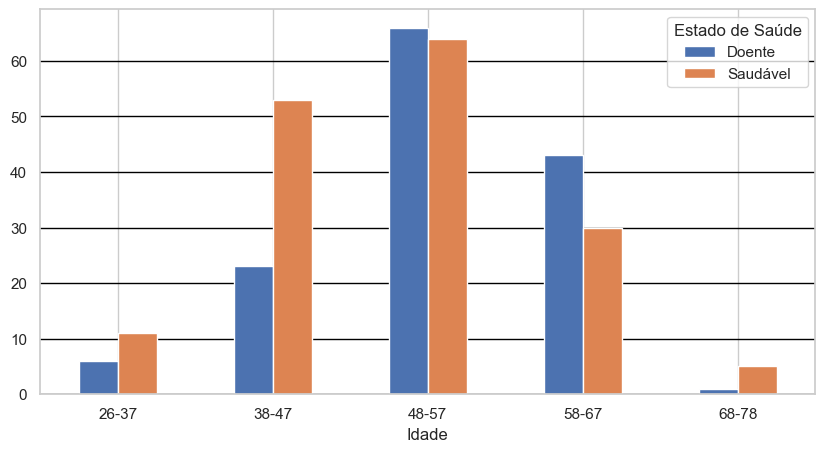

In [58]:
#Calcular a media de Doente
(tab_age[['Doente','Saudável']]
         .drop('Total')
         .plot.bar(rot=0, figsize=(10, 5), zorder = 2)
         .grid(zorder = 1, color='black', axis='y'))

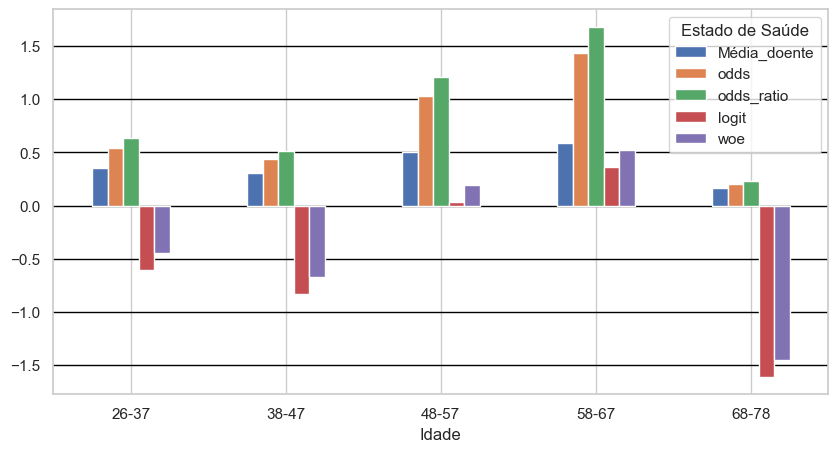

In [61]:
(tab_age[['Média_doente', 'odds', 'odds_ratio', 'logit', 'woe']]
         .drop('Total')
         .plot.bar(rot=0, figsize=(10, 5), zorder = 2)
         .grid(zorder = 1, color='black', axis='y'))